In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
data = yf.download("SPY", start="2000-01-01", auto_adjust=True)


[*********************100%***********************]  1 of 1 completed


In [16]:
data

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2000-01-03,91.887756,93.664700,90.900565,93.664700,8164300
2000-01-04,88.294411,91.019059,88.225307,90.683414,8089800
2000-01-05,88.452332,89.419779,86.714875,88.412844,12177900
2000-01-06,87.030815,89.400075,87.030815,88.215445,6227200
2000-01-07,92.085197,92.085197,88.491821,88.649772,8066500
...,...,...,...,...,...
2025-11-10,681.440002,682.179993,675.030029,677.239990,75842900
2025-11-11,683.000000,683.570007,678.729980,679.950012,58953400


In [28]:
prices = data["Close"].dropna()
prices.tail(32)

Ticker,SPY
Date,
2025-10-02,669.219971
2025-10-03,669.210022
2025-10-06,671.609985
2025-10-07,669.119995
2025-10-08,673.109985
2025-10-09,671.159973
2025-10-10,653.020020
2025-10-13,663.039978
2025-10-14,662.229980


In [31]:
quarterly_prices = prices.resample("Q").last()

C:\Users\benna435\AppData\Local\Temp\ipykernel_8660\2492274137.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_prices = prices.resample("Q").last()


In [30]:
quarterly_prices

Ticker,SPY
Date,
2000-03-31,95.248749
2000-06-30,92.239006
2000-09-30,91.416557
2000-12-31,83.756241
2001-03-31,74.700951
...,...
2024-12-31,580.989197
2025-03-31,556.199158
2025-06-30,616.141785


In [32]:
if quarterly_prices.index[-1] > prices.index[-1]:
    quarterly_prices = quarterly_prices.iloc[:-1]

In [36]:
quarterly_prices

Ticker,SPY
Date,
2000-03-31,95.248749
2000-06-30,92.239006
2000-09-30,91.416557
2000-12-31,83.756241
2001-03-31,74.700951
...,...
2024-09-30,566.868286
2024-12-31,580.989197
2025-03-31,556.199158


In [38]:
quarterly_returns = quarterly_prices.pct_change().dropna()


In [39]:
quarterly_returns

Ticker,SPY
Date,
2000-06-30,-0.031599
2000-09-30,-0.008916
2000-12-31,-0.083796
2001-03-31,-0.108115
2001-06-30,0.053635
...,...
2024-09-30,0.057513
2024-12-31,0.024910
2025-03-31,-0.042669


In [40]:
import numpy as np

def total_return(values):
    return (values[-1] - values[0]) / values[0]

def sharpe_ratio(returns, risk_free=0):
    mean_r = returns.mean()
    std_r = returns.std()
    return (mean_r - risk_free) / std_r if std_r != 0 else 0

def max_drawdown(values):
    arr = np.array(values)
    peaks = np.maximum.accumulate(arr)
    drawdowns = (arr - peaks) / peaks
    return drawdowns.min()

def annualized_volatility(returns, periods_per_year=4):
    return returns.std() * np.sqrt(periods_per_year)

def worst_losing_streak(returns):
    streak = 0
    max_streak = 0
    for r in returns:
        if r < 0:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak


In [42]:
values = quarterly_prices.values
rets = quarterly_returns.values

print("===== S&P 500 (SPY) Quarterly Baseline =====")
print("Total Return:", total_return(values))
print("Sharpe Ratio:", sharpe_ratio(rets))
print("Max Drawdown:", max_drawdown(values))
print("Annualized Volatility:", annualized_volatility(rets))
print("Worst Losing Streak:", worst_losing_streak(rets))


===== S&P 500 (SPY) Quarterly Baseline =====
Total Return: [5.99410755]
Sharpe Ratio: 0.27722450538973264
Max Drawdown: -0.4596134249127925
Annualized Volatility: 0.16368916665850997
Worst Losing Streak: 6


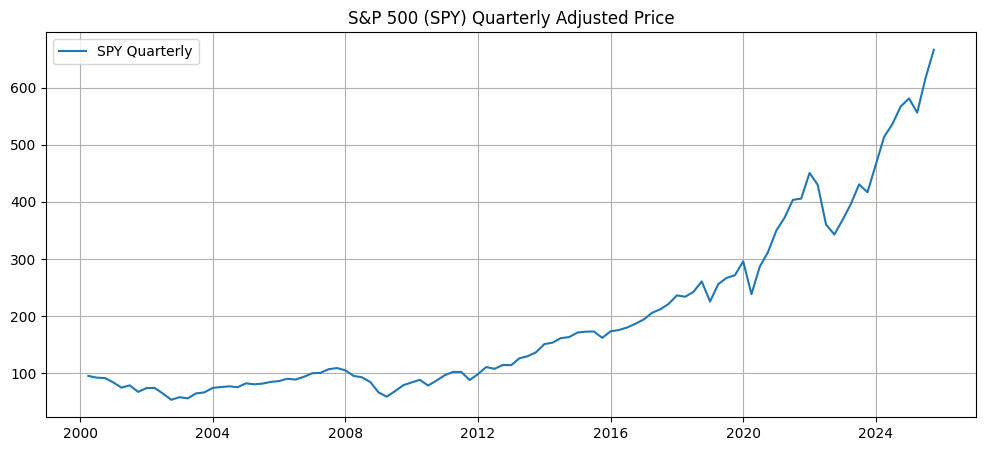

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(quarterly_prices, label="SPY Quarterly")
plt.title("S&P 500 (SPY) Quarterly Adjusted Price")
plt.grid(True)
plt.legend()
plt.show()


In [58]:
values = [0.75, 0.8, 0.6, 1.4, 2]
arr = np.array(values)
peaks = np.maximum.accumulate(arr)
drawdowns = (arr - peaks) / peaks

In [59]:
peaks

array([0.75, 0.8 , 0.8 , 1.4 , 2.  ])